In [11]:
import numpy as np
import itertools
import pandas as pd
import json
import requests
import re
from bs4 import BeautifulSoup
from lxml import etree
AGENT ="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/110.0.0.0 Safari/537.36"
HEADERS = {"User-Agent": AGENT}
CITY = "Sacramento"
# pd.set_option('display.max_columns', 500)
# pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5, 5]})
# pd.DataFrame({'a': [1, 2, 3], 'b': [4, 5,5]})
def clean_address(address):
    return address.replace("Image for ","").replace(" is not found", "")


In [12]:
XPATH_BASE = "//ul[@data-testid='property-list-container']//li[@data-testid='result-card']"
XPATH_STATUS = "//span[contains(@class,'statusText')]/text()"
XPATH_PRICE = "//span[@data-label='pc-price']/text()"
XPATH_SQFT = "//li[@data-label='pc-meta-sqft']//span[@data-label='meta-value']/text()"
XPATH_SQFT_LOT = "//li[@data-label='pc-meta-sqftlot']//span[@data-label='meta-value']/text()"
XPATH_BED_COUNT = "//li[@data-label='pc-meta-beds']//span[@data-label='meta-value']/text()"
XPATH_BATH_COUNT = "//li[@data-label='pc-meta-baths']//span[@data-label='meta-value']/text()"
# XPATH_ADDRESS = "//div[@data-label='pc-address']/text()" # BROKEN
# XPATH_CITY_ZIP = "//div[@data-label='pc-address-second']/text()"
# XPATH_ZIPCODE = "//div[@data-label='pc-address-second']/text()"
XPATH_FULL_ADDRESS = "//picture//img/@alt"


In [13]:
%%time
# start_urls = [f"https://www.realtor.com/realestateandhomes-search/Sacramento_CA/pg-{x}" for x in range(1, 38)]


# XPATH_STATUS = "//span[contains(@class,'statusText')]/text()"
XPATH_PRICE = "//span[@data-label='pc-price']/text()"
XPATH_SQFT = "//li[@data-label='pc-meta-sqft']//span[@data-label='meta-value']/text()"
XPATH_SQFT_LOT = "//li[@data-label='pc-meta-sqftlot']//span[@data-label='meta-value']/text()"
XPATH_BED_COUNT = "//li[@data-label='pc-meta-beds']//span[@data-label='meta-value']/text()"
XPATH_BATH_COUNT = "//li[@data-label='pc-meta-baths']//span[@data-label='meta-value']/text()"
XPATH_FULL_ADDRESS = "//picture//img/@alt"


CPU times: total: 0 ns
Wall time: 0 ns


# Crazy Test

In [14]:
# start_urls = [f"https://www.realtor.com/realestateandhomes-search/San-Francisco_CA/pg-{x}" for x in range(1, 36)]
# start_urls = [f"https://www.realtor.com/realestateandhomes-search/Sacramento_CA/pg-{x}" for x in range(1, 38)]
# url = "https://www.realtor.com/realestateandhomes-search/San-Francisco_CA/pg-1"
# webpage = requests.get(url, headers=HEADERS)

# Initialize Buckets

In [17]:
ALL_FULL_ADDRESS = []
ALL_STATUS=[]
ALL_PRICE=[]
ALL_SQFT=[]
ALL_SQFT_LOT=[]
ALL_BED_COUNT=[]
ALL_BATH_COUNT=[]

# <font color ='lime'> First Step

In [18]:
%%time
start_urls = [f"https://www.realtor.com/realestateandhomes-search/{CITY}_CA/pg-{x}" for x in range(1, 13)]
for url in start_urls:
    webpage = requests.get(url, headers=HEADERS)
    soup = BeautifulSoup(webpage.content, "html.parser")
    dom = etree.HTML(str(soup))
    # ADDRESS
    res_address = dom.xpath(XPATH_BASE+XPATH_FULL_ADDRESS)
    ALL_FULL_ADDRESS.append(res_address)

    # PRICE
    ALL_PRICE.append(dom.xpath(XPATH_BASE+XPATH_PRICE))

    # BED
    ALL_BED_COUNT.append(dom.xpath(XPATH_BASE+XPATH_BED_COUNT))

    # BATH
    ALL_BATH_COUNT.append(dom.xpath(XPATH_BASE+XPATH_BATH_COUNT))

    # SQFT
    ALL_SQFT.append(dom.xpath(XPATH_BASE+XPATH_SQFT))

    # SQFT LOT
    ALL_SQFT_LOT.append(dom.xpath(XPATH_BASE+XPATH_SQFT_LOT))
dict1 = {
    "address": ALL_FULL_ADDRESS,
    "price": ALL_PRICE,
    "sqft": ALL_SQFT,
    "sqft_lot": ALL_SQFT_LOT,
    "bed_count": ALL_BED_COUNT,
    "bath_count": ALL_BATH_COUNT,
}
print(dict1)
# %%time
# with open('./data/Sacramento1.json', 'w', encoding='utf-8') as f:
#     json.dump(dict1, f, ensure_ascii=False, indent=4)
print("DONE!")

{'address': [['2637 52nd Ave, Sacramento, CA 95822', '2422-2424 Loma Vista Dr, Sacramento, CA 95825', '2700 24th Ave, Sacramento, CA 95820', 'Image for 4915 Sunshine Ln, Sacramento, CA 95841 is not found', 'Image for 3327 38th St, Sacramento, CA 95817 is not found', 'Image for 6113 Hillsdale Blvd, Sacramento, CA 95842 is not found', 'Image for 1139 Sonoma Ave, Sacramento, CA 95815 is not found', 'Image for 609 Grand Ave, Sacramento, CA 95838 is not found', 'Image for 503 Dunbarton Cir, Sacramento, CA 95825 is not found', 'Image for 7081 Alcott Dr, Sacramento, CA 95820 is not found', 'Image for 1116 47th St, Sacramento, CA 95819 is not found', 'Image for 5508 2nd Ave, Sacramento, CA 95817 is not found', 'Image for 3824 Clay St, Sacramento, CA 95838 is not found', 'Image for 4212 Weymouth Ln, Sacramento, CA 95823 is not found', 'Image for 3004 Leta Ln, Sacramento, CA 95821 is not found', 'Image for 1719 Pluto Way, Sacramento, CA 95864 is not found', 'Image for 100 Butterworth Ave, Sacram

In [19]:
len(ALL_FULL_ADDRESS)

12

In [20]:
%%time
start_urls = [f"https://www.realtor.com/realestateandhomes-search/{CITY}_CA/pg-{x}" for x in range(13, 26)]
for url in start_urls:
    # url = "https://www.realtor.com/realestateandhomes-search/San-Francisco_CA/pg-1"
    webpage = requests.get(url, headers=HEADERS)
    soup = BeautifulSoup(webpage.content, "html.parser")
    dom = etree.HTML(str(soup))
    # ADDRESS
    res_address = dom.xpath(XPATH_BASE+XPATH_FULL_ADDRESS)
    ALL_FULL_ADDRESS.append(res_address)

    # PRICE
    ALL_PRICE.append(dom.xpath(XPATH_BASE+XPATH_PRICE))

    # BED
    ALL_BED_COUNT.append(dom.xpath(XPATH_BASE+XPATH_BED_COUNT))

    # BATH
    ALL_BATH_COUNT.append(dom.xpath(XPATH_BASE+XPATH_BATH_COUNT))

    # SQFT
    ALL_SQFT.append(dom.xpath(XPATH_BASE+XPATH_SQFT))

    # SQFT LOT
    ALL_SQFT_LOT.append(dom.xpath(XPATH_BASE+XPATH_SQFT_LOT))
dict2 = {
    "address": ALL_FULL_ADDRESS,
    "price": ALL_PRICE,
    "sqft": ALL_SQFT,
    "sqft_lot": ALL_SQFT_LOT,
    "bed_count": ALL_BED_COUNT,
    "bath_count": ALL_BATH_COUNT,
}
print(dict2)
# %%time
# with open('./data/Sacramento2.json', 'w', encoding='utf-8') as f:
#     json.dump(dict2, f, ensure_ascii=False, indent=4)
print("DONE!")

{'address': [['2637 52nd Ave, Sacramento, CA 95822', '2422-2424 Loma Vista Dr, Sacramento, CA 95825', '2700 24th Ave, Sacramento, CA 95820', 'Image for 4915 Sunshine Ln, Sacramento, CA 95841 is not found', 'Image for 3327 38th St, Sacramento, CA 95817 is not found', 'Image for 6113 Hillsdale Blvd, Sacramento, CA 95842 is not found', 'Image for 1139 Sonoma Ave, Sacramento, CA 95815 is not found', 'Image for 609 Grand Ave, Sacramento, CA 95838 is not found', 'Image for 503 Dunbarton Cir, Sacramento, CA 95825 is not found', 'Image for 7081 Alcott Dr, Sacramento, CA 95820 is not found', 'Image for 1116 47th St, Sacramento, CA 95819 is not found', 'Image for 5508 2nd Ave, Sacramento, CA 95817 is not found', 'Image for 3824 Clay St, Sacramento, CA 95838 is not found', 'Image for 4212 Weymouth Ln, Sacramento, CA 95823 is not found', 'Image for 3004 Leta Ln, Sacramento, CA 95821 is not found', 'Image for 1719 Pluto Way, Sacramento, CA 95864 is not found', 'Image for 100 Butterworth Ave, Sacram

In [21]:
len(ALL_FULL_ADDRESS)

25

In [22]:
%%time
start_urls = [f"https://www.realtor.com/realestateandhomes-search/{CITY}_CA/pg-{x}" for x in range(26, 38)]
for url in start_urls:
    # url = "https://www.realtor.com/realestateandhomes-search/San-Francisco_CA/pg-1"
    webpage = requests.get(url, headers=HEADERS)
    soup = BeautifulSoup(webpage.content, "html.parser")
    dom = etree.HTML(str(soup))
    # ADDRESS
    res_address = dom.xpath(XPATH_BASE+XPATH_FULL_ADDRESS)
    ALL_FULL_ADDRESS.append(res_address)

    # PRICE
    ALL_PRICE.append(dom.xpath(XPATH_BASE+XPATH_PRICE))

    # BED
    ALL_BED_COUNT.append(dom.xpath(XPATH_BASE+XPATH_BED_COUNT))

    # BATH
    ALL_BATH_COUNT.append(dom.xpath(XPATH_BASE+XPATH_BATH_COUNT))

    # SQFT
    ALL_SQFT.append(dom.xpath(XPATH_BASE+XPATH_SQFT))

    # SQFT LOT
    ALL_SQFT_LOT.append(dom.xpath(XPATH_BASE+XPATH_SQFT_LOT))
dict3 = {
    "address": ALL_FULL_ADDRESS,
    "price": ALL_PRICE,
    "sqft": ALL_SQFT,
    "sqft_lot": ALL_SQFT_LOT,
    "bed_count": ALL_BED_COUNT,
    "bath_count": ALL_BATH_COUNT,
}
print(dict3)
# %%time
# with open('./data/Sacramento2.json', 'w', encoding='utf-8') as f:
#     json.dump(dict2, f, ensure_ascii=False, indent=4)
print("DONE!")

{'address': [['2637 52nd Ave, Sacramento, CA 95822', '2422-2424 Loma Vista Dr, Sacramento, CA 95825', '2700 24th Ave, Sacramento, CA 95820', 'Image for 4915 Sunshine Ln, Sacramento, CA 95841 is not found', 'Image for 3327 38th St, Sacramento, CA 95817 is not found', 'Image for 6113 Hillsdale Blvd, Sacramento, CA 95842 is not found', 'Image for 1139 Sonoma Ave, Sacramento, CA 95815 is not found', 'Image for 609 Grand Ave, Sacramento, CA 95838 is not found', 'Image for 503 Dunbarton Cir, Sacramento, CA 95825 is not found', 'Image for 7081 Alcott Dr, Sacramento, CA 95820 is not found', 'Image for 1116 47th St, Sacramento, CA 95819 is not found', 'Image for 5508 2nd Ave, Sacramento, CA 95817 is not found', 'Image for 3824 Clay St, Sacramento, CA 95838 is not found', 'Image for 4212 Weymouth Ln, Sacramento, CA 95823 is not found', 'Image for 3004 Leta Ln, Sacramento, CA 95821 is not found', 'Image for 1719 Pluto Way, Sacramento, CA 95864 is not found', 'Image for 100 Butterworth Ave, Sacram

In [23]:
len(ALL_FULL_ADDRESS)

37

# Post hoc analysis

In [24]:
pd.DataFrame({"address":ALL_FULL_ADDRESS, "price":ALL_PRICE, "sqft":ALL_SQFT})

,address,price,sqft
0,"[2637 52nd Ave, Sacramento, CA 95822, 2422-242...","[$290,000, $449,500, $375,000, $427,000, $349,...","[1,422, 1,890, 810, 1,314, 768, 1,292, 1,192, ..."
1,"[8665 Florin Rd Unit 92, Sacramento, CA 95828,...","[$145,000, $395,000, $260,000, $209,000, $415,...","[1,440, 1,350, 821, 795, 1,074, 1,613, 3,382, ..."
2,"[1800 Potrero Way, Sacramento, CA 95822, 121 F...","[$649,990, $96,700, $385,000, $949,000, $710,0...","[1,540, 1,344, 1,274, 3,231, 1,491, 925, 2,108..."
3,"[3918 Eventide Ave., Sacramento, CA 95835, 391...","[$735,990, $583,794, $865,163, $592,448, $760,...","[3,135, 1,945, 2,620, 2,018, 3,046, 2,964, 2,3..."
4,"[6025 Dias Ave Spc 194, Sacramento, CA 95824, ...","[$100,000, $599,000, $775,000, $442,000, $179,...","[1,392, 2,048, 1,432, 1,451, 484, 2,160, 2,907..."
5,"[7320 Franklin Blvd Apt 3, Sacramento, CA 9582...","[$185,000, $542,950, $466,950, $526,950, $491,...","[840, 2,060, 1,640, 1,880, 1,900, 2,620, 1,750..."
6,"[5400 Pleasant Dr, Sacramento, CA 95822, 279 H...","[$789,990, $500,000, $475,000, $469,999, $409,...","[2,046, 1,350, 909, 1,552, 1,114, 2,175, 2,108..."
7,"[2460 Knoll St, Sacramento, CA 95815, 8517 Cha...","[$360,000, $469,000, $674,900, $565,000, $414,...","[1,100, 1,292, 2,444, 1,111, 1,530, 2,175, 896..."
8,"[8665 Florin Rd Unit 172, Sacramento, CA 95828...","[$75,000, $64,900, $259,000, $294,900, $340,00...","[1,440, 672, 876, 1,190, 1,564, 1,014, 1,120, ..."
9,"[7855 Cottonwood Ln Unit 58, Sacramento, CA 95...","[$150,000, $168,000, $149,900, $29,900, $95,00...","[1,056, 1,056, 1,152, 749, 804, 1,344, 720, 67..."


In [25]:
import itertools
mylist=[[1,2,3,4],[2,3,4,5],[3,4,5,6]]
print(list(itertools.chain(*mylist)))

[1, 2, 3, 4, 2, 3, 4, 5, 3, 4, 5, 6]


In [ ]:
 # {
#     "address": ALL_FULL_ADDRESS,
#     "price": ALL_PRICE,
#     "sqft": ALL_SQFT,
#     "sqft_lot": ALL_SQFT_LOT,
#     "bed_count": ALL_BED_COUNT,
#     "bath_count": ALL_BATH_COUNT,
# }

In [26]:
ADDRESS_FINAL =list(itertools.chain(*ALL_FULL_ADDRESS))
PRICE_FINAL =list(itertools.chain(*ALL_PRICE))
SQFT_FINAL =list(itertools.chain(*ALL_SQFT))
SQFTLOT_FINAL =list(itertools.chain(*ALL_SQFT_LOT))
BED_FINAL =list(itertools.chain(*ALL_BED_COUNT))
BATH_FINAL =list(itertools.chain(*ALL_BATH_COUNT))

In [27]:
len(ADDRESS_FINAL)

1528

In [28]:
len(PRICE_FINAL)

1528

In [36]:
df1 = pd.DataFrame({"address":ADDRESS_FINAL, "price":PRICE_FINAL})

In [37]:
df1['address'] = df1['address'].apply(lambda x : clean_address(x))

In [38]:
# df1.to_csv(f'./data/Realtor_{CITY}_Clean_Address.csv')

In [39]:
df1['price']=df1['price'].apply(lambda p : p.replace("$", "").replace(",", ""))

In [42]:
display(df1)

,address,price
0,"2637 52nd Ave, Sacramento, CA 95822",290000
1,"2422-2424 Loma Vista Dr, Sacramento, CA 95825",449500
2,"2700 24th Ave, Sacramento, CA 95820",375000
3,"4915 Sunshine Ln, Sacramento, CA 95841",427000
4,"3327 38th St, Sacramento, CA 95817",349000
...,...,...
1523,"6240 25th St, Sacramento, CA 95822",170000
1524,"2116-2120 Del Paso Blvd, Sacramento, CA 95815",350000
1525,"9132 Gerber Rd, Sacramento, CA 95829",4995000
1526,"3255 W St, Sacramento, CA 95817",325000


In [43]:
df1['price']=pd.to_numeric(df1['price'])

In [44]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1528 entries, 0 to 1527
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  1528 non-null   object
 1   price    1528 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 24.0+ KB


In [45]:
# df1.to_csv('./data/SF_address_price_CLEANED_NEWEST.csv',index=False)

In [46]:
df1['zipcode'] = df1['address'].apply(lambda z : re.findall(r"\d{5}",z)[-1])

In [47]:
df1

,address,price,zipcode
0,"2637 52nd Ave, Sacramento, CA 95822",290000,95822
1,"2422-2424 Loma Vista Dr, Sacramento, CA 95825",449500,95825
2,"2700 24th Ave, Sacramento, CA 95820",375000,95820
3,"4915 Sunshine Ln, Sacramento, CA 95841",427000,95841
4,"3327 38th St, Sacramento, CA 95817",349000,95817
...,...,...,...
1523,"6240 25th St, Sacramento, CA 95822",170000,95822
1524,"2116-2120 Del Paso Blvd, Sacramento, CA 95815",350000,95815
1525,"9132 Gerber Rd, Sacramento, CA 95829",4995000,95829
1526,"3255 W St, Sacramento, CA 95817",325000,95817


In [52]:
df1['city'] = CITY
df1

,address,price,zipcode,city
0,"2637 52nd Ave, Sacramento, CA 95822",290000,95822,Sacramento
1,"2422-2424 Loma Vista Dr, Sacramento, CA 95825",449500,95825,Sacramento
2,"2700 24th Ave, Sacramento, CA 95820",375000,95820,Sacramento
3,"4915 Sunshine Ln, Sacramento, CA 95841",427000,95841,Sacramento
4,"3327 38th St, Sacramento, CA 95817",349000,95817,Sacramento
...,...,...,...,...
1523,"6240 25th St, Sacramento, CA 95822",170000,95822,Sacramento
1524,"2116-2120 Del Paso Blvd, Sacramento, CA 95815",350000,95815,Sacramento
1525,"9132 Gerber Rd, Sacramento, CA 95829",4995000,95829,Sacramento
1526,"3255 W St, Sacramento, CA 95817",325000,95817,Sacramento


<Axes: xlabel='zipcode', ylabel='price'>

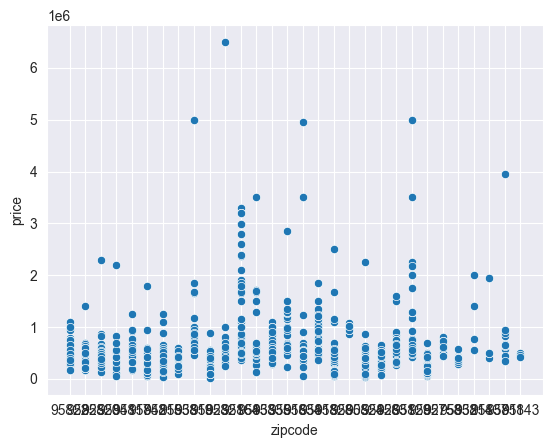

In [56]:
import seaborn as sns
sns.scatterplot(x="zipcode", y="price", data=df1)

In [48]:
df1.to_csv(f'./data/Realtor_{CITY}_Clean_Address.csv',index=True)

In [49]:
df1.to_json(f'./data/Realtor_{CITY}_Clean_Address_orient_records.json',orient='records',index=True)

In [50]:
df1.to_json(f'./data/Realtor_{CITY}_Clean_Address.json')